In [39]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from src.features.pipeline import loading_model_df, build_manual_pipeline

sys.path.insert(0,os.path.abspath('C:/Users/Academic/Documents/Projects/customer-churn-prediction'))
df = loading_model_df()
X_df = df.drop(columns=['customerID', 'churn_flag'])
X,feature_names = build_manual_pipeline(X_df)


In [28]:
inertias, sil_scores = [],[]

for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X, km.labels_))

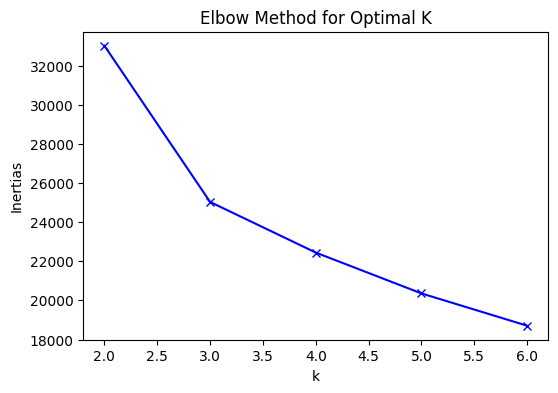

In [29]:
plt.figure(figsize=(6,4))
plt.plot(range(2,7), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertias')
plt.title('Elbow Method for Optimal K')
plt.show()


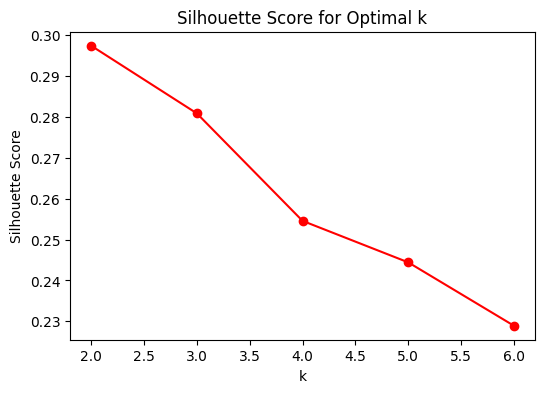

In [30]:
plt.figure(figsize=(6,4))
plt.plot(range(2,7), sil_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()



In [41]:
best_k = 4
km = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = km.fit_predict(X)

df_num = pd.DataFrame(X, columns=feature_names)
df_num['churn_flag'] = df['churn_flag'].values
df_num['cluster'] = df['cluster'].values


profile = df_num.groupby('cluster').mean().round(2)
display(profile)

counts = df_num['cluster'].value_counts().sort_index()
churn_rates = df_num.groupby('cluster')['churn_flag'].mean().round(3)

print("Cluster Sizes:\n", counts)
print("Cluster Churn Rates:\n", churn_rates)

,tenure,MonthlyCharges,TotalCharges,avg_monthly_charge,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,tenure_bucket_13-24,tenure_bucket_25-48,tenure_bucket_49-72,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,churn_flag
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.91,-1.09,-0.25,-1.09,0.00,0.63,0.27,0.61,0.31,0.12,...,0.00,0.35,0.65,0.20,0.18,0.15,0.17,0.09,0.10,0.04
1,1.16,0.93,1.48,0.93,0.67,0.00,0.32,0.47,0.33,0.28,...,0.00,0.14,0.86,0.57,0.71,0.72,0.59,0.76,0.77,0.14
2,-0.61,0.54,-0.38,0.53,0.77,0.00,0.12,0.02,0.14,0.56,...,0.25,0.32,0.00,0.23,0.31,0.34,0.24,0.47,0.46,0.47
3,-0.87,-1.07,-0.85,-1.07,0.00,0.50,0.18,0.09,0.14,0.22,...,0.24,0.13,0.00,0.13,0.11,0.08,0.12,0.05,0.06,0.24


Cluster Sizes:
 cluster
0    1016
1    1820
2    2444
3    1763
Name: count, dtype: int64
Cluster Churn Rates:
 cluster
0    0.042
1    0.141
2    0.468
3    0.240
Name: churn_flag, dtype: float64
